In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
img1 = cv.imread('sat_1.jpg')


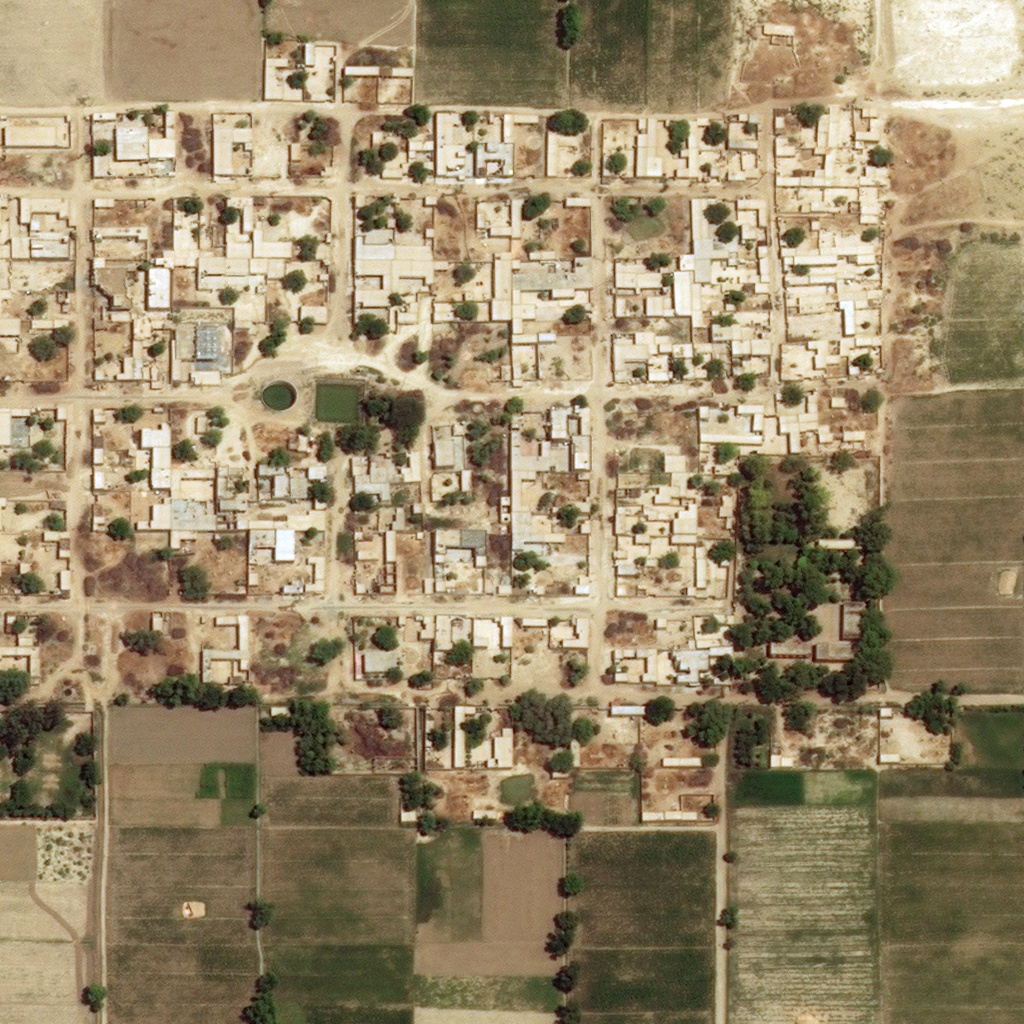

In [4]:
sat_img = Image.open('sat_1.jpg')
sat_img

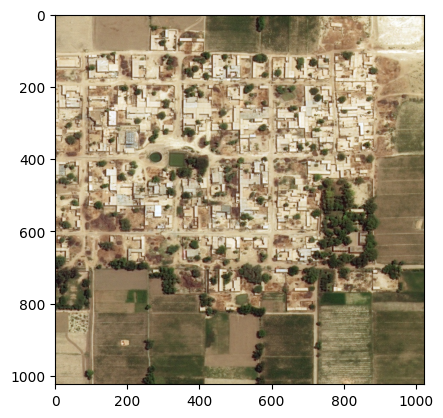

In [5]:
#Image is in BGR for pyplot, so we convert it to RGB

plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.show()

In [6]:
wd, ht, chn = img1.shape
img1.shape

(1024, 1024, 3)

In [7]:
type(img1)

numpy.ndarray

In [8]:
# Convert image to array

img_array = np.array(img1)
img_array

array([[[145, 183, 201],
        [145, 183, 201],
        [149, 187, 205],
        ...,
        [193, 215, 221],
        [212, 232, 237],
        [214, 234, 239]],

       [[141, 179, 197],
        [144, 182, 200],
        [149, 187, 205],
        ...,
        [209, 231, 237],
        [209, 228, 235],
        [202, 222, 227]],

       [[138, 176, 194],
        [140, 178, 196],
        [143, 181, 199],
        ...,
        [206, 225, 232],
        [209, 228, 235],
        [204, 223, 230]],

       ...,

       [[125, 164, 179],
        [125, 164, 179],
        [127, 166, 181],
        ...,
        [ 55,  91,  99],
        [ 66,  99, 108],
        [ 59,  92, 101]],

       [[138, 174, 190],
        [134, 170, 186],
        [132, 168, 186],
        ...,
        [ 57,  89, 100],
        [ 57,  89, 100],
        [ 57,  89, 100]],

       [[145, 181, 197],
        [141, 177, 193],
        [134, 170, 188],
        ...,
        [ 67,  99, 110],
        [ 63,  95, 106],
        [ 61,  93, 104]]

In [9]:
# Transform Image to array
sat_arr = np.array(sat_img)
sat_arr


# Transform array to image
arr_2_img = Image.fromarray(sat_arr)


In [10]:
# Isolate channels

def channel(img, n):
    """Isolate the nth channel from the image.

       n = 0: red, 1: green, 2: blue
    """
    a = np.array(img)
    a[:,:,(n!=0, n!=1, n!=2)] *= 0
    print(Image.fromarray(a), 'Get Channel n: ', n)
  
    return Image.fromarray(a)


def imageResize(img, n):
    width, height = img.size 

    print('Original size:', width, '/', height, 'Resize:',n)
    
    newWidth = int(width / n)
    newHeight = int(height / n)
    img.resize((newWidth, newHeight), Image.ANTIALIAS)
    print('New size:', newWidth, '/', newHeight)
    return img


<PIL.Image.Image image mode=RGB size=1024x1024 at 0x23017E63580> Get Channel n:  0


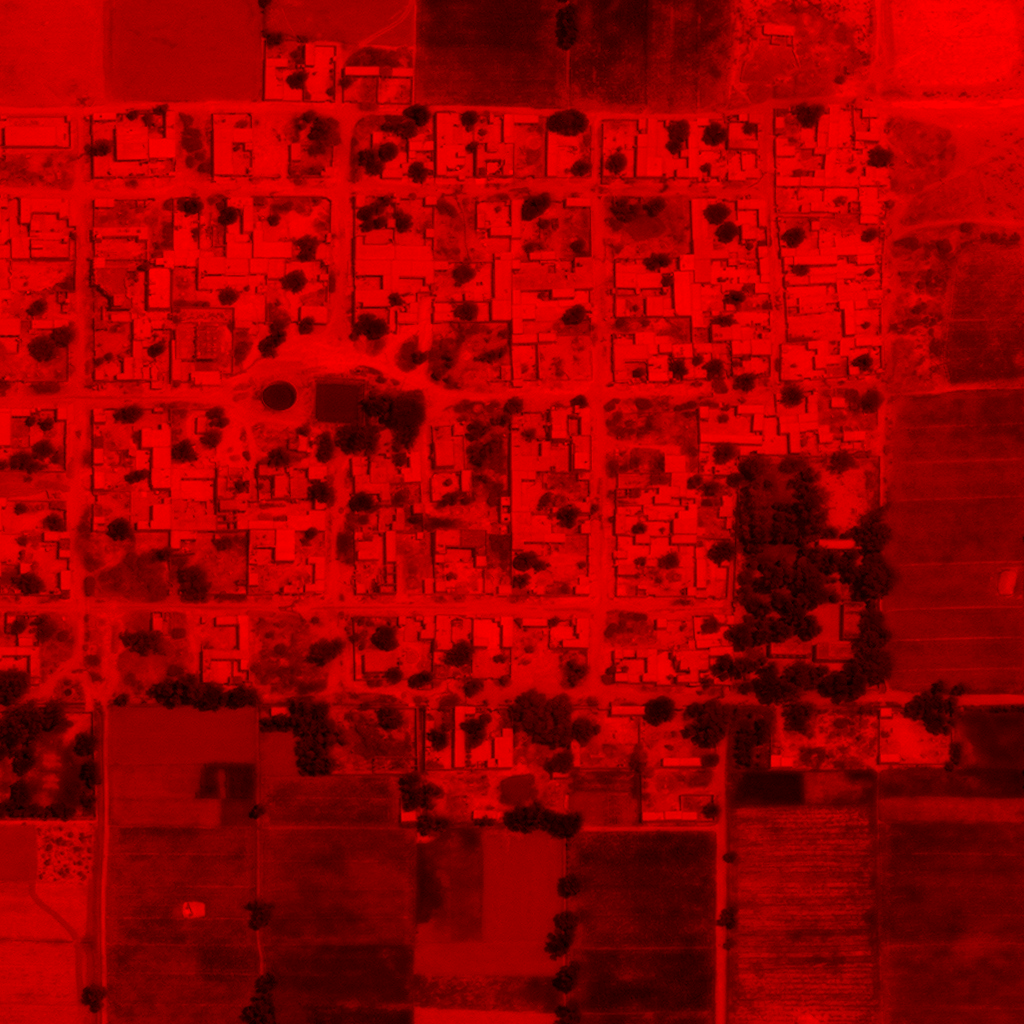

In [11]:
x0_channel = channel(arr_2_img, 0)
x0_channel

<PIL.Image.Image image mode=RGB size=1024x1024 at 0x23017E63F10> Get Channel n:  1


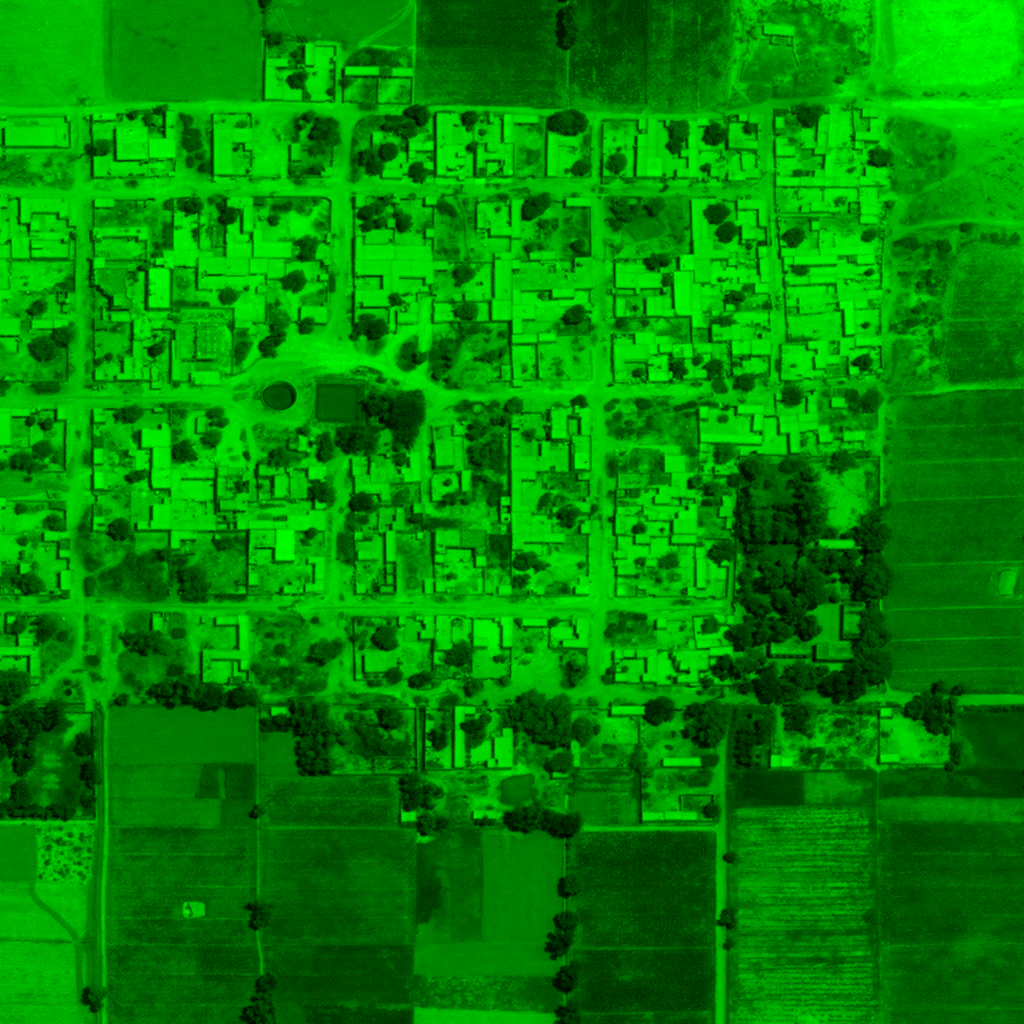

In [12]:
x1_channel = channel(arr_2_img, 1)
x1_channel

<PIL.Image.Image image mode=RGB size=1024x1024 at 0x23017E63520> Get Channel n:  2


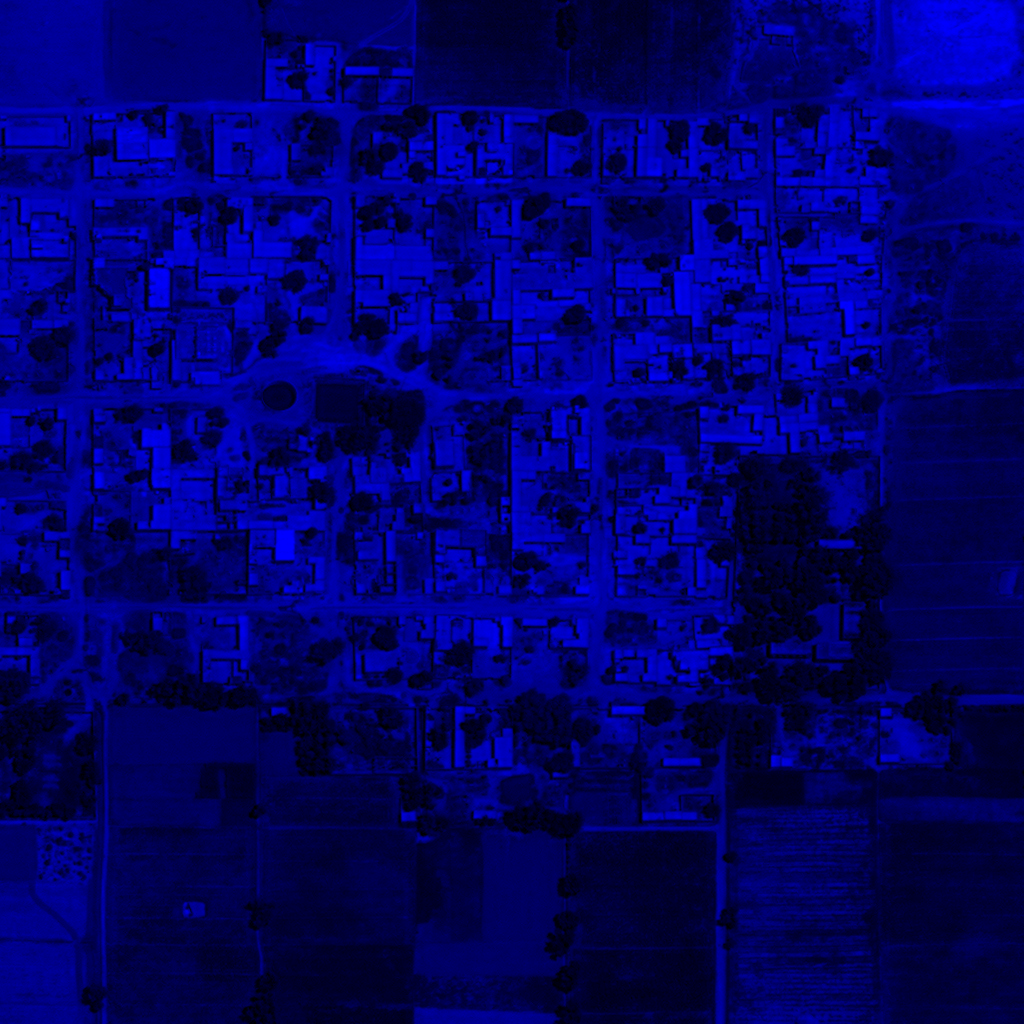

In [13]:
x2_channel = channel(arr_2_img, 2)
x2_channel

In [14]:
# Resize Image
xFile = imageResize(sat_img, 20)

Original size: 1024 / 1024 Resize: 20
New size: 51 / 51


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19764\2537052854.py:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img.resize((newWidth, newHeight), Image.ANTIALIAS)


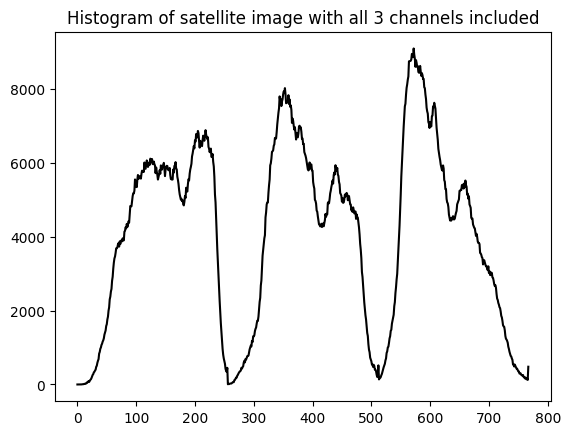

In [15]:
sat_Hist = sat_img.histogram()
sat_Hist

plt.plot(sat_Hist, color = 'k')
plt.title('Histogram of satellite image with all 3 channels included')
plt.show()

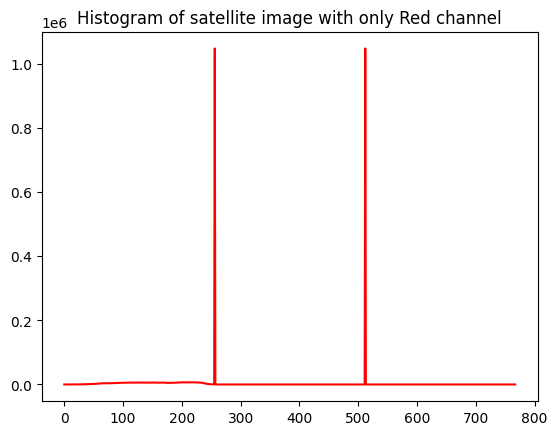

In [16]:
Hist_0= x0_channel.histogram()

plt.plot(Hist_0, color = 'r')
plt.title('Histogram of satellite image with only Red channel')
plt.show()

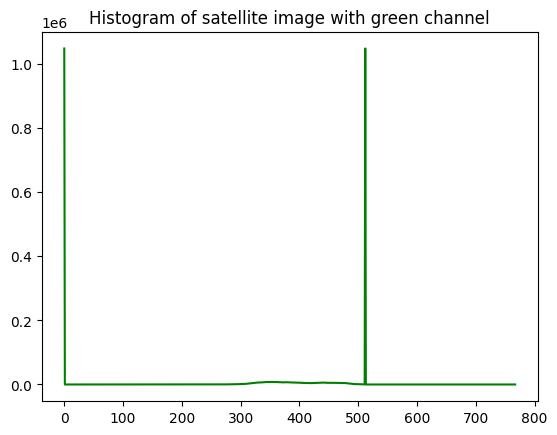

In [17]:
Hist_1= x1_channel.histogram()

plt.plot(Hist_1, color = 'g')
plt.title('Histogram of satellite image with green channel')
plt.show()

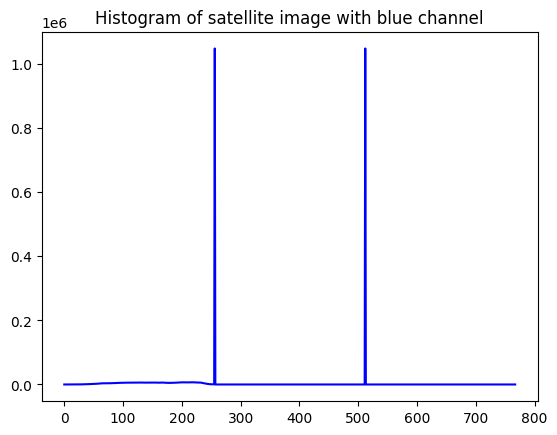

In [18]:
Hist_2= x2_channel.histogram()

plt.plot(Hist_0, color = 'b')
plt.title('Histogram of satellite image with blue channel')
plt.show()

In [19]:
from cv2 import cvtColor, COLOR_BGR2GRAY

sat_gray = cvtColor(img1, COLOR_BGR2GRAY )
sat_gray

array([[184, 184, 188, ..., 214, 231, 233],
       [180, 183, 188, ..., 230, 228, 221],
       [177, 179, 182, ..., 225, 228, 223],
       ...,
       [164, 164, 166, ...,  89,  98,  91],
       [175, 171, 169, ...,  89,  89,  89],
       [182, 178, 171, ...,  99,  95,  93]], dtype=uint8)

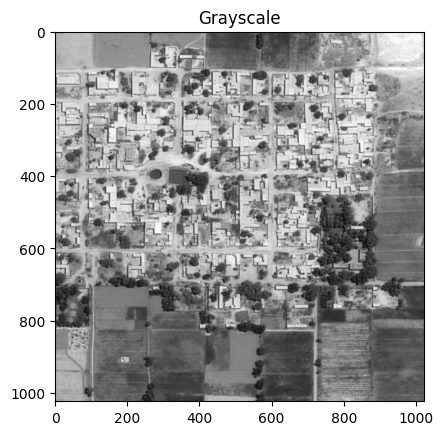

In [20]:
plt.imshow(sat_gray, cmap='gray')
plt.title('Grayscale')
plt.show()

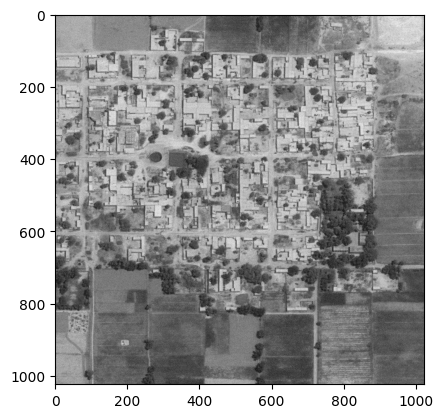

In [21]:
# Add noise to the image

noise = np.random.normal(2, scale= 12, size= [wd, ht])

img_noise = sat_gray + noise
plt.imshow(img_noise, cmap = 'gray')
plt.show()

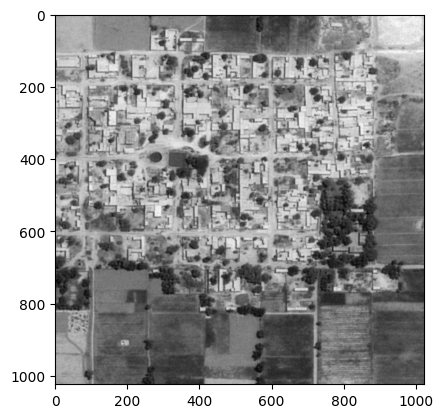

In [22]:
# Adding Gaussian Blur

Sx = -1
Sy = 3
img_gauss = cv.GaussianBlur(img_noise, (5,5), Sx, Sy)

plt.imshow(img_gauss, cmap = 'gray')
plt.show()


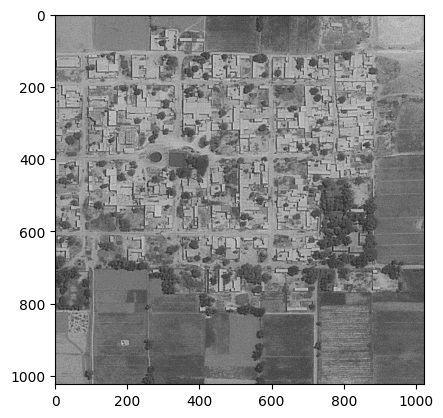

In [23]:
from matplotlib.pyplot import show


lin_ker = np.array([[-1, -1, -1],
                   [-1, 9, -1],  
                   [-1, -1, -1]])

img_filter = cv.filter2D(img_gauss, ddepth= -1, kernel = lin_ker)

plt.imshow(img_filter, cmap= 'gray')
plt.show()

In [24]:
print(img_filter)
print(type(img_filter))

[[198.0824522  197.30144283 194.00086058 ... 211.69145016 224.25376864
  229.07621659]
 [192.31537883 191.93036165 185.62246038 ... 229.79578966 241.66078238
  246.61813444]
 [181.23571365 181.4803218  174.26460551 ... 235.75614779 246.47503304
  252.19689161]
 ...
 [170.08753401 159.55562935 143.65263909 ...  94.58457719  98.18385398
   96.24256785]
 [197.16888688 189.78030134 172.2970133  ... 105.26325958 107.74363971
  105.23403827]
 [219.12721206 213.4938348  193.72809047 ... 107.55013641 106.52829396
  103.48778141]]
<class 'numpy.ndarray'>


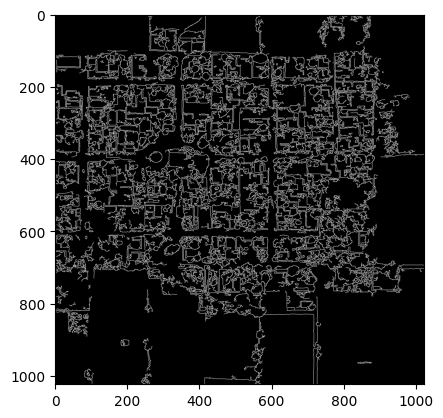

In [25]:
sat_edge = cv.Canny(sat_gray, threshold1= 75, threshold2= 350)
plt.imshow(sat_edge, cmap='gray')
plt.show()

In [26]:
type(sat_edge)

numpy.ndarray

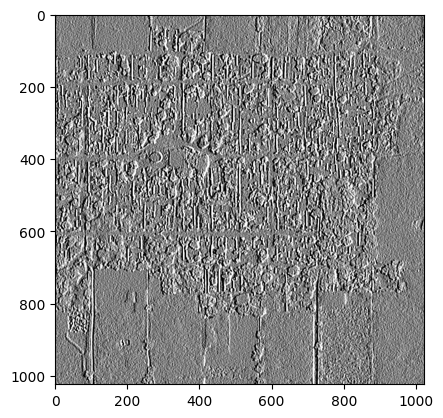

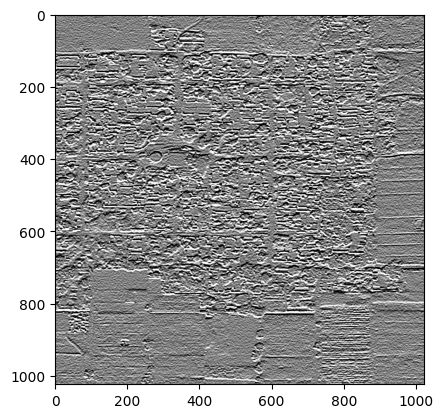

In [27]:
# Using Sobel matrix to detect edge

from cv2 import CV_16S

plt.figure(1)
img_gradient_1 = cv.Sobel(img_filter, ddepth= CV_16S, dx = 1, dy= 0, ksize = 7)
plt.imshow(img_gradient_1, cmap= 'gray')
plt.show()

img_gradient_2 = cv.Sobel(img_filter, ddepth= CV_16S, dx = 0, dy= 1, ksize = 7)
plt.imshow(img_gradient_2, cmap= 'gray')
plt.show()

In [28]:
img_gradient_1

array([[     0,  -3641,  -5306, ...,   5004,   7810,      0],
       [     0,  -3541,  -4772, ...,   4344,   7260,      0],
       [     0,  -2651,  -2803, ...,   2213,   5697,      0],
       ...,
       [     0, -16211, -18807, ...,   5515,   2003,      0],
       [     0, -17082, -21988, ...,   5562,   2178,      0],
       [     0, -17767, -24045, ...,   5282,   2092,      0]], dtype=int16)